<a href="https://colab.research.google.com/github/cpython-projects/da_2603/blob/main/lesson_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

url = https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

In [81]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data (1).csv


In [2]:
import pandas as pd

In [82]:
df = pd.read_csv('kc_house_data (1).csv')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

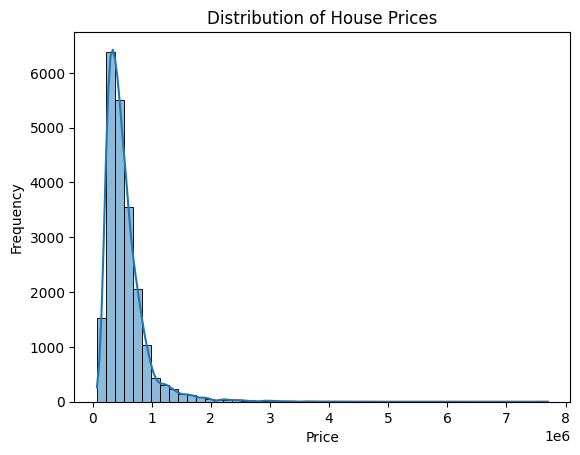

In [5]:
sns.histplot(df['price'], kde=True, bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

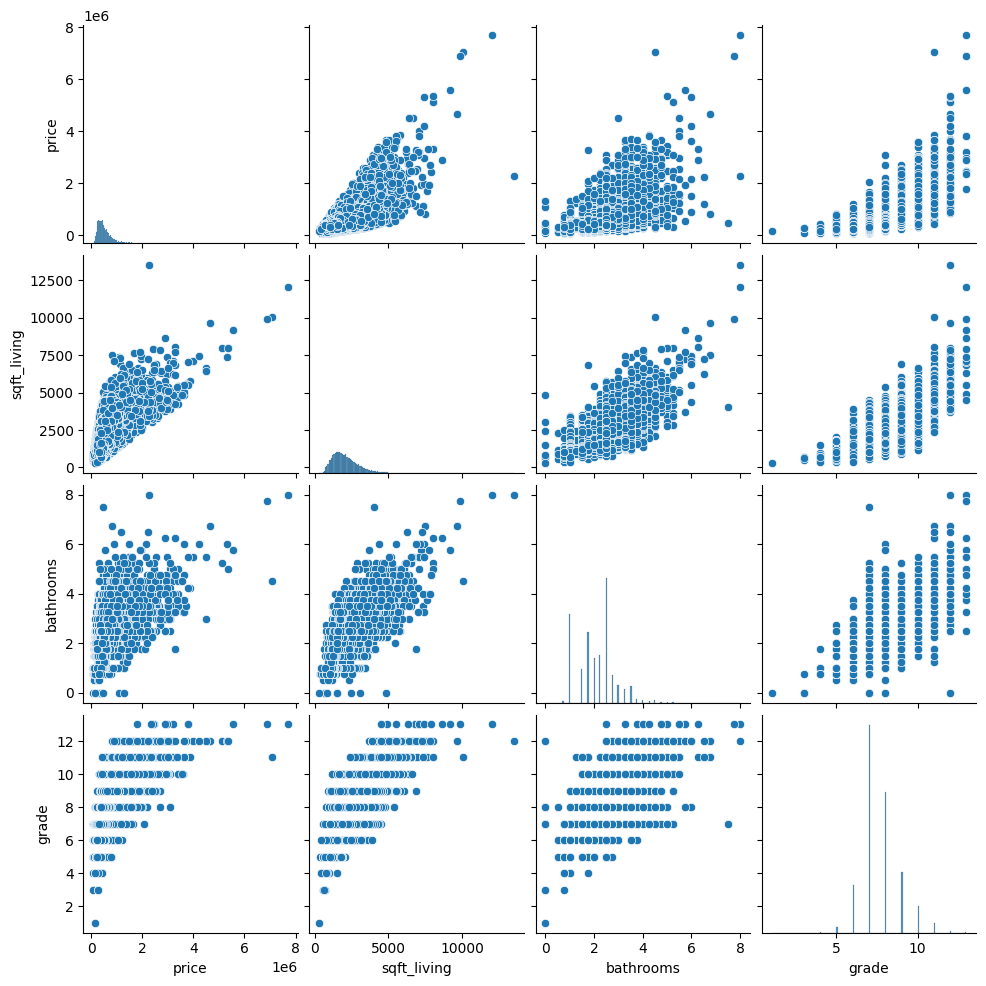

In [6]:
cols = ['price', 'sqft_living', 'bathrooms', 'grade']
sns.pairplot(df[cols])
plt.show()

In [7]:
fig = px.scatter_matrix(df, dimensions=['price', 'sqft_living', 'bathrooms', 'grade'], color='price')
fig.show()

In [9]:
res = df.groupby('yr_built')['price'].mean().reset_index()
res

,yr_built,price
0,1900,581387.206897
1,1901,556935.931034
2,1902,673007.407407
3,1903,480958.195652
4,1904,583756.644444
...,...,...
111,2011,544522.000000
112,2012,527447.335294
113,2013,678545.452736
114,2014,683681.754919


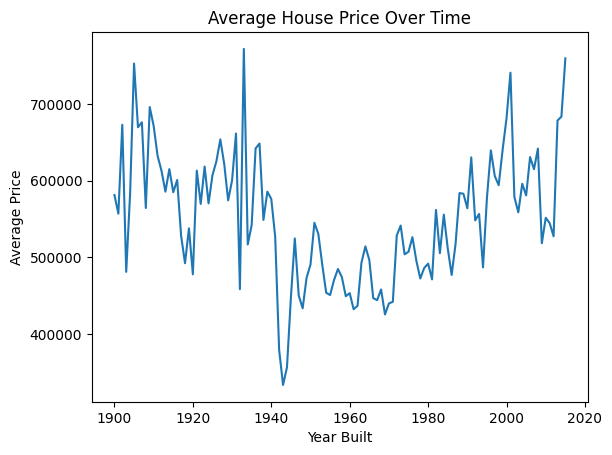

In [10]:
sns.lineplot(x='yr_built', y='price', data=res)
plt.xlabel('Year Built')
plt.ylabel('Average Price')
plt.title('Average House Price Over Time')
plt.show()

In [11]:
fig = px.line(res, x='yr_built', y='price', title='Average House Price Over Time')
fig.show()

In [12]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x='sqft_living',
    y='price',
    z='grade',
    color='bathrooms',
    title="3D график: цена, площадь, и класс дома"
)
fig.show()

In [13]:
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="long",
    color="price",
    size="sqft_living",
    hover_name="zipcode",
    mapbox_style="carto-positron",
    zoom=9,
    title="Карта домов по координатам"
)
fig.show()

In [14]:
fig = px.histogram(
    df,
    x="price",
    animation_frame="yr_built",
    nbins=40,
    title="Анимация изменения распределения цен по году постройки"
)
fig.show()

In [15]:
import plotly.graph_objects as go
from plotly.graph_objects import Funnel

price_bins = [0, 200000, 400000, 600000, 800000, 1000000, df['price'].max()]
labels = ["<200k", "200-400k", "400-600k", "600-800k", "800k-1M", "1M+"]

counts = pd.cut(df['price'], bins=price_bins, labels=labels).value_counts().sort_index()

fig = go.Figure(go.Funnel(
    y=counts.index.astype(str),
    x=counts.values,
    textinfo="value+percent previous"
))
fig.update_layout(title="Воронка по ценовым сегментам")
fig.show()

In [16]:
fig = px.treemap(
    df,
    path=["grade", "condition"],
    values="price",
    title="Treemap: класс и состояние дома"
)
fig.show()

In [17]:
df['grade_str'] = 'Grade ' + df['grade'].astype(str)
df['condition_str'] = 'Condition ' + df['condition'].astype(str)

fig = px.treemap(
    df,
    path=["grade_str", "condition_str"],
    values="price",
    title="Treemap: класс и состояние дома (с подписями)"
)
fig.show()

In [18]:
fig = px.sunburst(
    df,
    path=["grade_str", "condition_str"],
    values="price",
    title="Sunburst: класс и состояние дома"
)
fig.show()

In [19]:
from geopy.geocoders import Nominatim

In [20]:
geolocator = Nominatim(user_agent="real_estate_map")

In [23]:
location = geolocator.geocode("Kyiv, Ukraine")

In [22]:
location

Location(Київ, Україна, (50.4500336, 30.5241361, 0.0))

In [27]:
location = geolocator.geocode("Khreshatyk 44, Kyiv, Ukraine")

In [26]:
location

In [28]:
geolocator = Nominatim(user_agent="colab-geocoder")

In [32]:
location = geolocator.geocode("10 Peremohy, Kyiv, Ukraine")
location

Location(Міністерство освіти і науки України, 10, Берестейський проспект, Арештантські городи, Шевченківський район, Київ, 01035, Україна, (50.448769, 30.4854404, 0.0))

In [33]:
location.latitude

50.448769

In [34]:
location.longitude

30.4854404

### Pivot Tables 01

In [35]:
df.pivot_table(index='bedrooms', values='price', aggfunc='mean')

,price
bedrooms,
0,4.095038e+05
1,3.176429e+05
2,4.013727e+05
3,4.662321e+05
4,6.354195e+05
5,7.865998e+05
6,8.255206e+05
7,9.511847e+05
8,1.105077e+06


In [36]:
df.groupby('bedrooms')['price'].mean()

,price
bedrooms,
0,4.095038e+05
1,3.176429e+05
2,4.013727e+05
3,4.662321e+05
4,6.354195e+05
5,7.865998e+05
6,8.255206e+05
7,9.511847e+05
8,1.105077e+06


In [37]:
df.pivot_table(index='yr_built', columns='condition', values='price', aggfunc='mean')

condition,1,2,3,4,5
yr_built,,,,,
1900,392725.0,767500.0,592927.000000,492707.692308,720080.692308
1901,427000.0,NaN,511271.692308,546722.222222,692851.666667
1902,NaN,NaN,609916.666667,691207.142857,836800.000000
1903,NaN,167500.0,509785.714286,458300.000000,442796.714286
1904,NaN,NaN,489983.523810,483866.666667,847749.583333
...,...,...,...,...,...
2011,NaN,NaN,544522.000000,NaN,NaN
2012,NaN,NaN,527447.335294,NaN,NaN
2013,NaN,NaN,678545.452736,NaN,NaN


In [39]:
df.groupby(['yr_built', 'condition'])['price'].mean().unstack()

condition,1,2,3,4,5
yr_built,,,,,
1900,392725.0,767500.0,592927.000000,492707.692308,720080.692308
1901,427000.0,NaN,511271.692308,546722.222222,692851.666667
1902,NaN,NaN,609916.666667,691207.142857,836800.000000
1903,NaN,167500.0,509785.714286,458300.000000,442796.714286
1904,NaN,NaN,489983.523810,483866.666667,847749.583333
...,...,...,...,...,...
2011,NaN,NaN,544522.000000,NaN,NaN
2012,NaN,NaN,527447.335294,NaN,NaN
2013,NaN,NaN,678545.452736,NaN,NaN


In [40]:
df['bedrooms'].value_counts()

,count
bedrooms,
3,9824
4,6882
2,2760
5,1601
6,272
1,199
7,38
0,13
8,13


In [42]:
df.pivot_table(index='bedrooms',  values=['price', 'sqft_living'], columns='floors', aggfunc='mean')

price                                             \
floors             1.0            1.5           2.0           2.5   
bedrooms                                                            
0         1.937375e+05            NaN  4.642667e+05           NaN   
1         2.971509e+05  437861.666667  3.576583e+05  4.150000e+05   
2         3.784425e+05  476956.912088  4.402596e+05  9.701000e+05   
3         4.087522e+05  531256.083969  5.391454e+05  6.546830e+05   
4         5.340299e+05  596869.032951  6.960283e+05  1.112848e+06   
5         5.984906e+05  603084.097297  9.520711e+05  1.284810e+06   
6         5.811468e+05  684315.000000  9.231336e+05  1.900514e+06   
7         5.273508e+05  667128.571429  9.665242e+05  3.042500e+06   
8         7.676000e+05  700000.000000  1.088000e+06           NaN   
9                  NaN            NaN  8.410000e+05  9.999995e+05   
10        1.148000e+06            NaN  6.550000e+05           NaN   
11                 NaN            NaN  5.200000e+05           NaN   
33        6.400000e+05            NaN           NaN           NaN   

                                   sqft_living                            \
floors             3.0        3.5          1.0          1.5          2.0   
bedrooms                                                                   
0         3.340000e+05  1095000.0   477.000000          NaN  2388.333333   
1         3.901667e+05        NaN   808.382716  1150.000000  1245.833333   
2         4.713630e+05   502000.0  1167.629933  1398.148352  1423.734406   
3         5.263421e+05   516875.0  1630.499908  1759.447837  2142.712316   
4         9.250450e+05        NaN  2213.986991  2054.593123  2849.922868   
5         1.406400e+06        NaN  2598.398347  2401.443243  3512.863226   
6         1.422560e+06        NaN  2815.057692  2601.333333  3653.974790   
7         2.280000e+06        NaN  2927.777778  3402.857143  3986.842105   
8                  NaN  3300000.0  3508.000000  2280.000000  3645.000000   
9                  NaN        NaN          NaN          NaN  3550.000000   
10                 NaN        NaN  4590.000000          NaN  3265.000000   
11                 NaN        NaN          NaN          NaN  3000.000000   
33                 NaN        NaN  1620.000000          NaN          NaN   

                                             
floors            2.5           3.0     3.5  
bedrooms                                     
0                 NaN   1450.000000  3064.0  
1         3000.000000    993.333333     NaN  
2         2841.400000   1336.308943  1520.0  
3         2198.392857   1611.913580  1582.5  
4         3363.775862   2992.573770     NaN  
5         3719.913043   4215.000000     NaN  
6         4673.571429   4456.400000     NaN  
7         5780.000000  13540.000000     NaN  
8                 NaN           NaN  7710.0  
9         4225.000000           NaN     NaN  
10                NaN           NaN     NaN  
11                NaN           NaN     NaN  
33                NaN           NaN     NaN

In [44]:
table = df.pivot_table(index=['yr_built', 'bathrooms'], values='price', aggfunc='mean')

In [45]:
type(table)

pandas.core.frame.DataFrame

In [46]:
table

price
yr_built bathrooms              
1900     1.00       4.203673e+05
         1.50       6.180000e+05
         1.75       5.465111e+05
         2.00       5.822880e+05
         2.25       1.300000e+06
...                          ...
2015     3.25       1.266238e+06
         3.50       1.162491e+06
         4.00       9.436580e+05
         4.25       1.150000e+06
         4.50       7.710050e+05

[1442 rows x 1 columns]

In [47]:
table.loc[(2015, 4.0)]

,2015
,4.0
price,943658.0


In [50]:
df['bedrooms'].value_counts(normalize=True) * 100

,proportion
bedrooms,
3,45.454125
4,31.841947
2,12.770092
5,7.407579
6,1.258502
1,0.920742
7,0.175820
0,0.060149
8,0.060149


In [51]:
df['size_bin'] = pd.cut(df['sqft_living'], bins=[0, 1000, 2000, 3000, 4000, 10000],
                        labels=["0-1k", "1k-2k", "2k-3k", "3k-4k", "4k+"])

In [52]:
df.pivot_table(index='size_bin', columns='bedrooms', values='price', aggfunc='mean')

<ipython-input-52-2074719636>:1: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



bedrooms,0,1,2,3,4,5,6,7,8,9,10,11,33
size_bin,,,,,,,,,,,,,
0-1k,193737.5,285702.858156,3.081738e+05,2.790895e+05,2.605214e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1k-2k,292600.0,391552.425926,4.189640e+05,3.915643e+05,4.041890e+05,4.248944e+05,4.362829e+05,2.800000e+05,NaN,NaN,NaN,NaN,640000.0
2k-3k,347475.0,445750.000000,6.893424e+05,5.914322e+05,5.680097e+05,5.693684e+05,5.723439e+05,5.205475e+05,5.166000e+05,934000.000000,660000.0,520000.0,NaN
3k-4k,1095000.0,NaN,1.186297e+06,8.954598e+05,8.777978e+05,8.496449e+05,7.655614e+05,7.589091e+05,6.915000e+05,859999.666667,650000.0,NaN,NaN
4k+,1295650.0,NaN,3.278000e+06,1.533055e+06,1.445819e+06,1.583643e+06,1.627923e+06,1.539158e+06,1.733333e+06,925000.000000,1148000.0,NaN,NaN


In [53]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_str,condition_str,size_bin
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,Grade 7,Condition 3,1k-2k
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,Grade 7,Condition 3,2k-3k
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,Grade 6,Condition 3,0-1k
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,Grade 7,Condition 5,1k-2k
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,Grade 8,Condition 3,1k-2k


In [54]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_str,condition_str,size_bin
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,Grade 7,Condition 3,1k-2k
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,Grade 7,Condition 3,2k-3k
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,Grade 6,Condition 3,0-1k
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,Grade 7,Condition 5,1k-2k
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,Grade 8,Condition 3,1k-2k


In [56]:
df.pivot_table(index=pd.Grouper(key='date', freq='ME'), values='price', aggfunc='mean')

,price
date,
2014-05-31,548080.276584
2014-06-30,558002.199541
2014-07-31,544788.764360
2014-08-31,536445.276804
2014-09-30,529253.821871
2014-10-31,539026.971778
2014-11-30,521961.009213
2014-12-31,524461.866757
2015-01-31,525870.889571


In [57]:
pd.crosstab(df['bedrooms'], df['floors'])

floors,1.0,1.5,2.0,2.5,3.0,3.5
bedrooms,,,,,,
0,4,0,6,0,2,1
1,162,21,12,1,3,0
2,1951,182,497,5,123,2
3,5455,786,3118,56,405,4
4,2383,698,3682,58,61,0
5,605,185,775,23,13,0
6,104,30,119,14,5,0
7,9,7,19,2,1,0
8,5,1,6,0,0,1


In [60]:
pd.crosstab(df['waterfront'], df['view'])

view,0,1,2,3,4
waterfront,,,,,
0,19489,331,955,491,184
1,0,1,8,19,135


In [63]:
pd.crosstab(df['bedrooms'], df['floors'], margins=True, normalize=True) * 100

floors,1.0,1.5,2.0,2.5,3.0,3.5,All
bedrooms,,,,,,,
0,0.018507,0.000000,0.027761,0.000000,0.009254,0.004627,0.060149
1,0.749549,0.097164,0.055522,0.004627,0.013881,0.000000,0.920742
2,9.026975,0.842086,2.299542,0.023134,0.569102,0.009254,12.770092
3,25.239439,3.636700,14.426503,0.259103,1.873872,0.018507,45.454125
4,11.025772,3.229538,17.036043,0.268357,0.282238,0.000000,31.841947
5,2.799241,0.855966,3.585805,0.106417,0.060149,0.000000,7.407579
6,0.481192,0.138805,0.550595,0.064776,0.023134,0.000000,1.258502
7,0.041642,0.032388,0.087910,0.009254,0.004627,0.000000,0.175820
8,0.023134,0.004627,0.027761,0.000000,0.000000,0.004627,0.060149


In [64]:
df['price_cat'] = pd.cut(df['price'], bins=[0, 300000, 600000, 1000000, df['price'].max()],
                         labels=['Low', 'Medium', 'High', 'Luxury'])

In [65]:
pd.crosstab(df['price_cat'], df['waterfront'], normalize='columns') * 100

waterfront,0,1
price_cat,,
Low,21.296037,1.226994
Medium,50.191142,12.883436
High,22.167832,22.085890
Luxury,6.344988,63.803681


In [66]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_str,condition_str,size_bin,price_cat
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,Grade 7,Condition 3,1k-2k,Low
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,Grade 7,Condition 3,2k-3k,Medium
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,Grade 6,Condition 3,0-1k,Low
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,Grade 7,Condition 5,1k-2k,High
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,Grade 8,Condition 3,1k-2k,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,98103,47.6993,-122.346,1530,1509,Grade 8,Condition 3,1k-2k,Medium
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,98146,47.5107,-122.362,1830,7200,Grade 8,Condition 3,2k-3k,Medium
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,98144,47.5944,-122.299,1020,2007,Grade 7,Condition 3,1k-2k,Medium
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,98027,47.5345,-122.069,1410,1287,Grade 8,Condition 3,1k-2k,Medium


In [67]:
df_new = df.set_index('date')

In [68]:
df_new

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_str,condition_str,size_bin,price_cat
date,,,,,,,,,,,,,,,,,,,,,
2014-10-13,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,Grade 7,Condition 3,1k-2k,Low
2014-12-09,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,Grade 7,Condition 3,2k-3k,Medium
2015-02-25,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,Grade 6,Condition 3,0-1k,Low
2014-12-09,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,Grade 7,Condition 5,1k-2k,High
2015-02-18,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,Grade 8,Condition 3,1k-2k,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-21,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,98103,47.6993,-122.346,1530,1509,Grade 8,Condition 3,1k-2k,Medium
2015-02-23,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,98146,47.5107,-122.362,1830,7200,Grade 8,Condition 3,2k-3k,Medium
2014-06-23,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,98144,47.5944,-122.299,1020,2007,Grade 7,Condition 3,1k-2k,Medium


In [78]:
df_new.resample('3D')['price'].mean()

,price
date,
2014-05-02,5.264497e+05
2014-05-05,5.514311e+05
2014-05-08,5.303579e+05
2014-05-11,6.292102e+05
2014-05-14,5.092224e+05
...,...
2015-05-15,4.500000e+05
2015-05-18,NaN
2015-05-21,NaN


<Axes: xlabel='bedrooms', ylabel='price'>

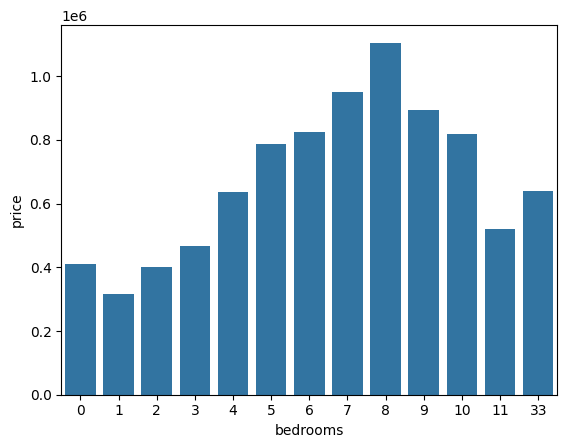

In [79]:
pivot = df.pivot_table(values='price', index='bedrooms', aggfunc='mean').reset_index()
sns.barplot(x='bedrooms', y='price', data=pivot)

In [80]:
pivot

,bedrooms,price
0,0,4.095038e+05
1,1,3.176429e+05
2,2,4.013727e+05
3,3,4.662321e+05
4,4,6.354195e+05
5,5,7.865998e+05
6,6,8.255206e+05
7,7,9.511847e+05
8,8,1.105077e+06
9,9,8.939998e+05
